## Data Analysis - Venn Diagram and UpSetPlot
In this notebook, I present two libries used to show data intersection.<br>
* UpSetPlot: https://upsetplot.readthedocs.io/en/stable/api.html
* PyVenn: https://pypi.org/project/venn/

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import itertools as it
from venn import venn
from upsetplot import plot as upsetplot
from matplotlib.lines import Line2D

### Input data
I will make the intersection among the nodes from 4 networks. <br>
Each network has a list of nodes that can be seen as a list of names.

In [2]:
networks={}
networks['HINT'] = nx.read_edgelist('data analysis datasets/HINT.edgelist',delimiter='\t')
networks['IntAct'] = nx.read_edgelist('data analysis datasets/IntAct.edgelist',delimiter='\t')
networks['Reactome'] = nx.read_edgelist('data analysis datasets/Reactome.edgelist',delimiter='\t')
networks['STRING'] = nx.read_edgelist('data analysis datasets/STRING.edgelist',delimiter='\t')

In [3]:
print('Nodes list is "just" a list of names')
print(list(networks['HINT'].nodes)[:5], list(networks['IntAct'].nodes)[:5])

Nodes list is "just" a list of names
['A0A024QYV7', 'EWSR1', 'DDX39B', 'CDC37', 'ELF5'] ['AMPH', 'SYNJ1', 'DNM1', 'DNM2', 'PPP3CC']


## Venn Diagram in groups of three

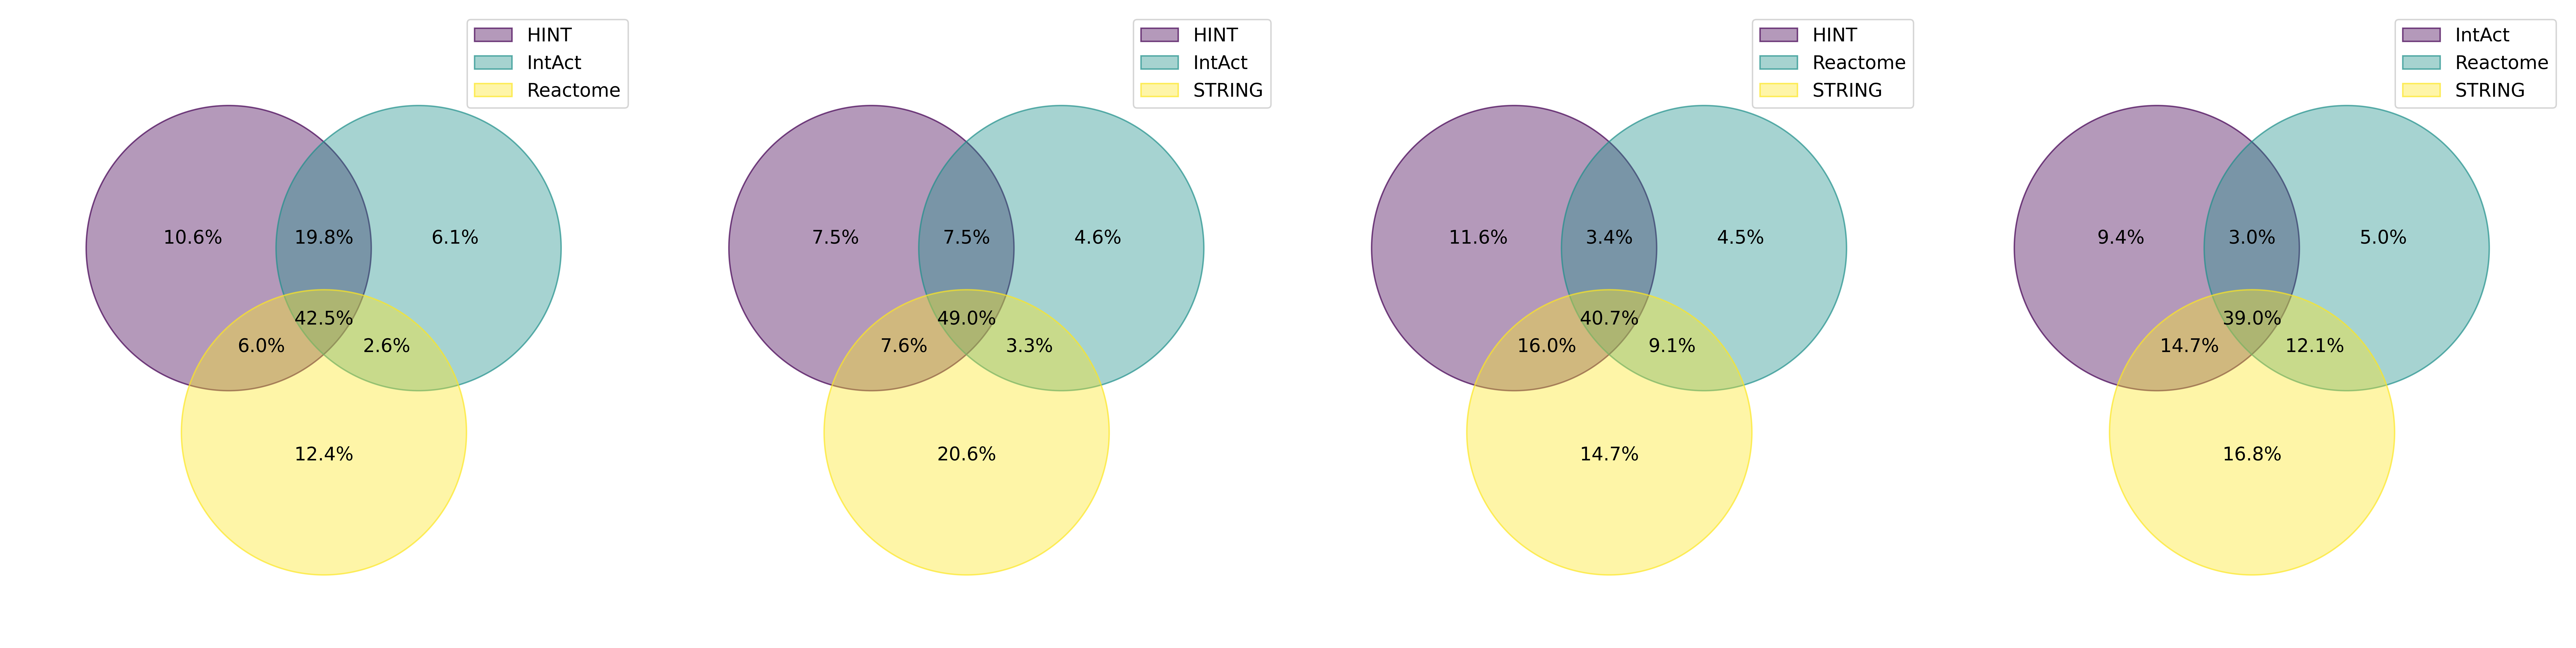

In [4]:
groups=it.combinations(networks.keys(),3)

plt.figure(figsize=(25,10),dpi=550)
for i,triple in enumerate(groups):
    plt.subplot(1,4,i+1)
    nodes={}
    for name in triple:
        nodes[name]=set(networks[name].nodes)
    venn(nodes,fmt="{percentage:.1f}%",ax=plt.gca())
    plt.tight_layout()
plt.tight_layout()
plt.show()

###### The Venn library offers little customization for the legend. Bellow, I present a code where the colors are fixed and use a single legend.

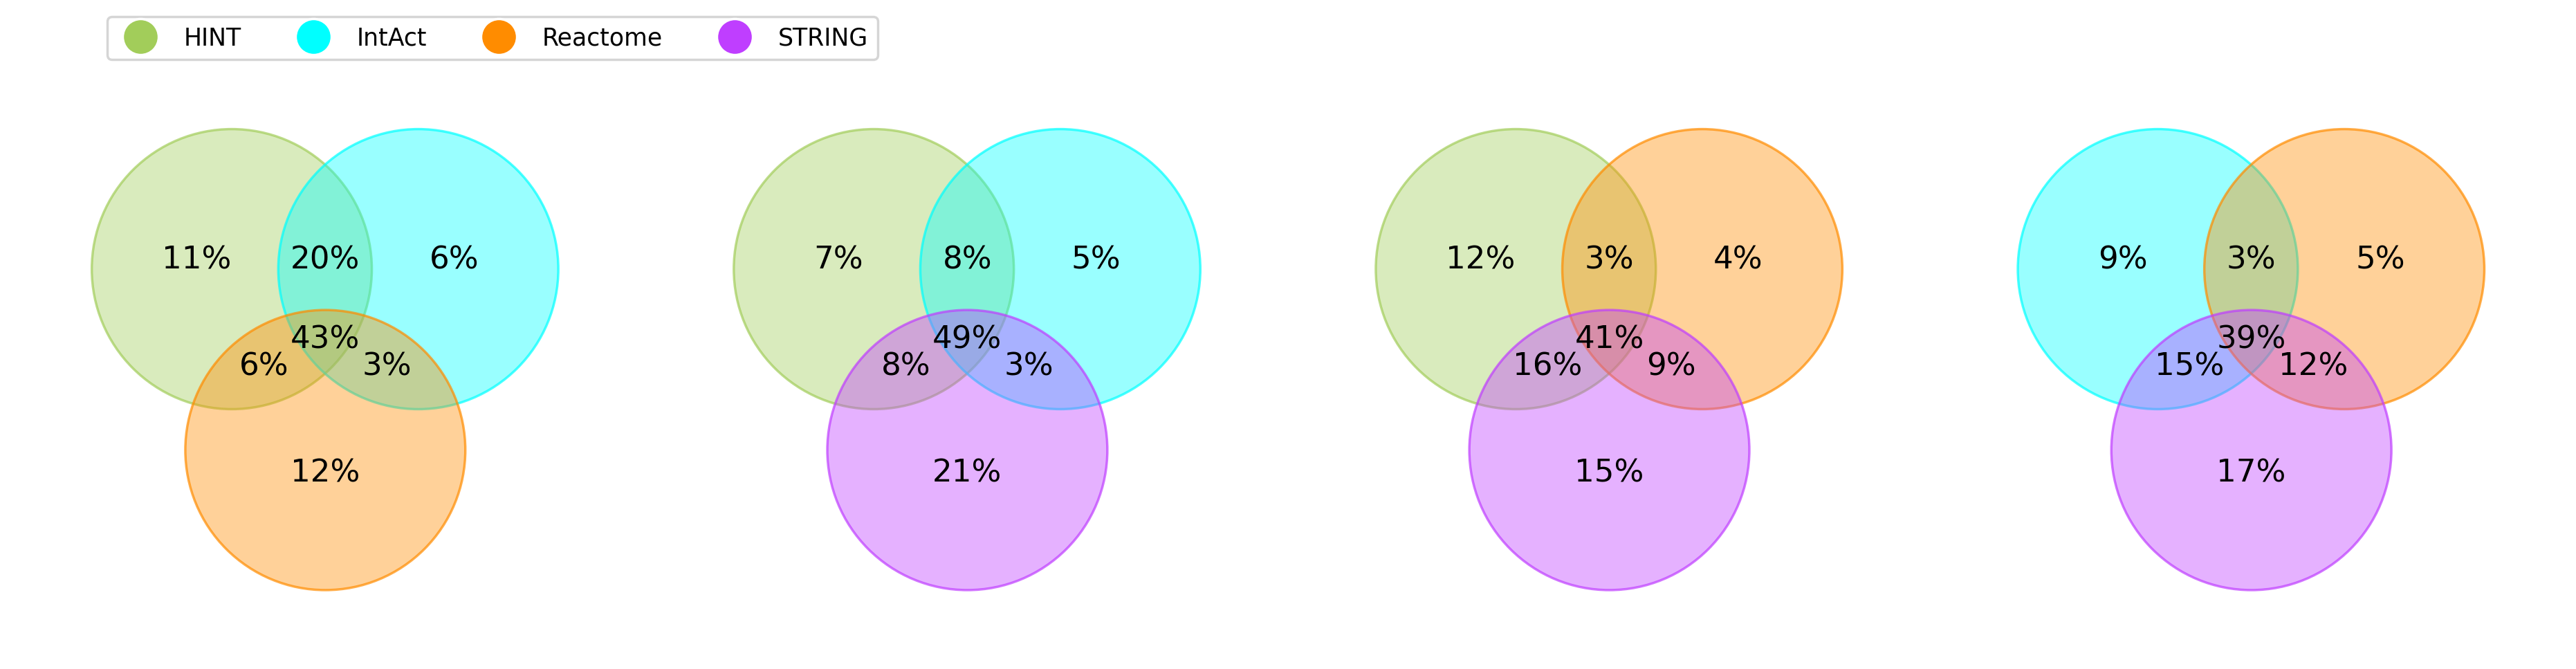

In [5]:
colors={
    'HINT':'#A2CD5A',
    'IntAct':'#00FFFF',
    'Reactome':'#FF8C00',
    'STRING':'#BF3EFF'
}

groups=list(it.combinations(sorted(networks.keys()),3))

plt.figure(figsize=(15,8),dpi=250)
for i,triple in enumerate(groups):
    plt.subplot(1,4,i+1)
    nodes={}
    for name in triple:
        nodes[name]=set(networks[name].nodes)
    colorList=[color for netName,color in colors.items() if netName in triple]
    venn(nodes,fmt="{percentage:.0f}%",ax=plt.gca(),cmap=colorList,legend_loc=None)
    plt.tight_layout()
    
#Adding the legend
legend_elements=[]
for n in colors:
    color=colors[n]
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w', label=n,markerfacecolor=color, markersize=15)
    )
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-3, 1.05), ncol=len(legend_elements))

#plt.tight_layout()
plt.show()

###### Using a 4-Venn Diagram and changing the subplots sizes

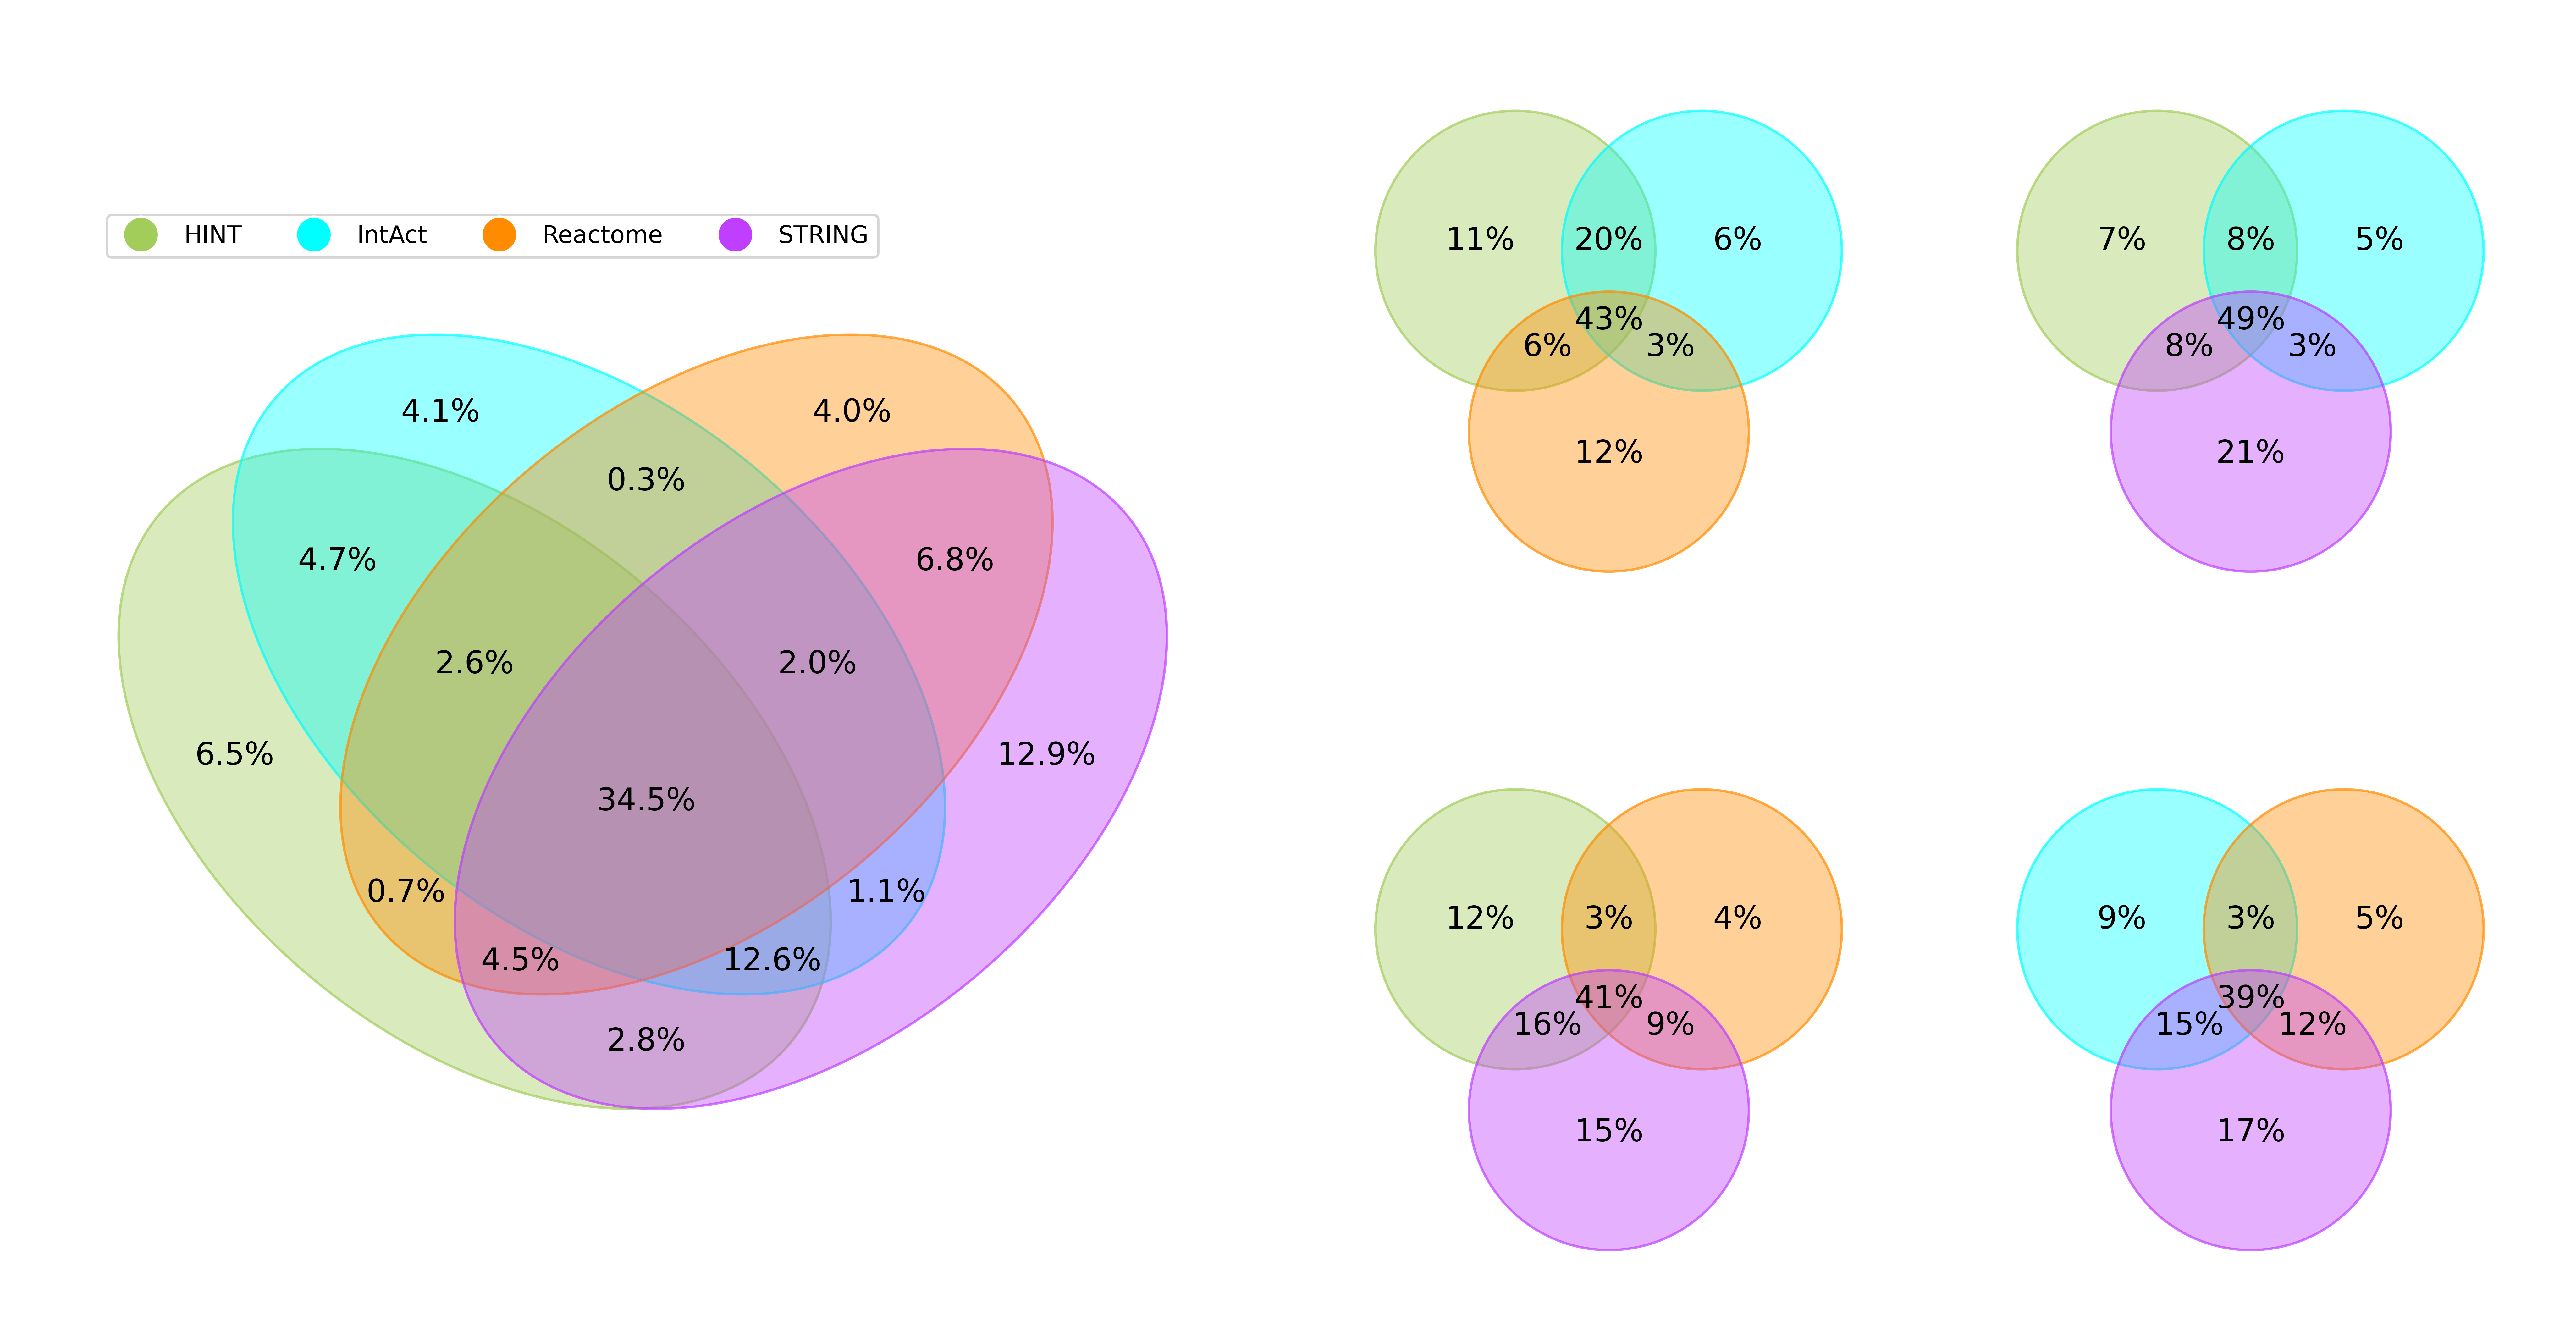

In [6]:
groups=list(it.combinations(sorted(networks.keys()),3))

plt.figure(figsize=(15,8),dpi=550)

axes=[
    plt.subplot2grid(shape=(2, 4), loc=(0, 0), colspan=2,rowspan=2),
    plt.subplot2grid(shape=(2, 4), loc=(0, 2)),
    plt.subplot2grid(shape=(2, 4), loc=(0, 3)),
    plt.subplot2grid(shape=(2, 4), loc=(1, 2)),
    plt.subplot2grid(shape=(2, 4), loc=(1, 3))
]

#4 circles diagram
nodes={}
for name in networks:
    nodes[name]=set(networks[name].nodes)

venn(nodes,fmt="{percentage:.1f}%",ax=axes[0],cmap=list(colors.values()),legend_loc=None)
plt.tight_layout()
#3 circles diagram
for i,triple in enumerate(groups):
    nodes={}
    for name in triple:
        nodes[name]=set(networks[name].nodes)
    colorList=[color for netName,color in colors.items() if netName in triple]
    
    venn(nodes,fmt="{percentage:.0f}%",ax=axes[i+1],cmap=colorList,legend_loc=None)
    plt.tight_layout()

    
#Adding the legend
legend_elements=[]
for n in colors:
    color=colors[n]
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w', label=n,markerfacecolor=color, markersize=15)
    )
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-3, 1.8), ncol=len(legend_elements))

plt.show()

# UpSetPlot

#### Example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

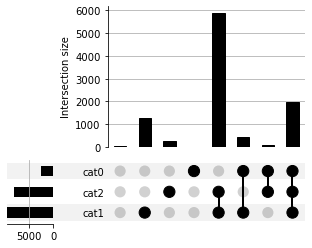

In [7]:
from upsetplot import generate_counts
from upsetplot import from_contents
example = generate_counts()
display(example)
upsetplot(example)
plt.show()

In [8]:
nodes={}
for name in networks:
    nodes[name]=set(networks[name].nodes)
    
nodesIntersection = from_contents(nodes)
nodesIntersection.head()

id
HINT IntAct Reactome STRING       
True True   True     True     DLX3
                     True    RPL36
            False    True     LHPP
            True     True     ARF5
            False    True     PRB2

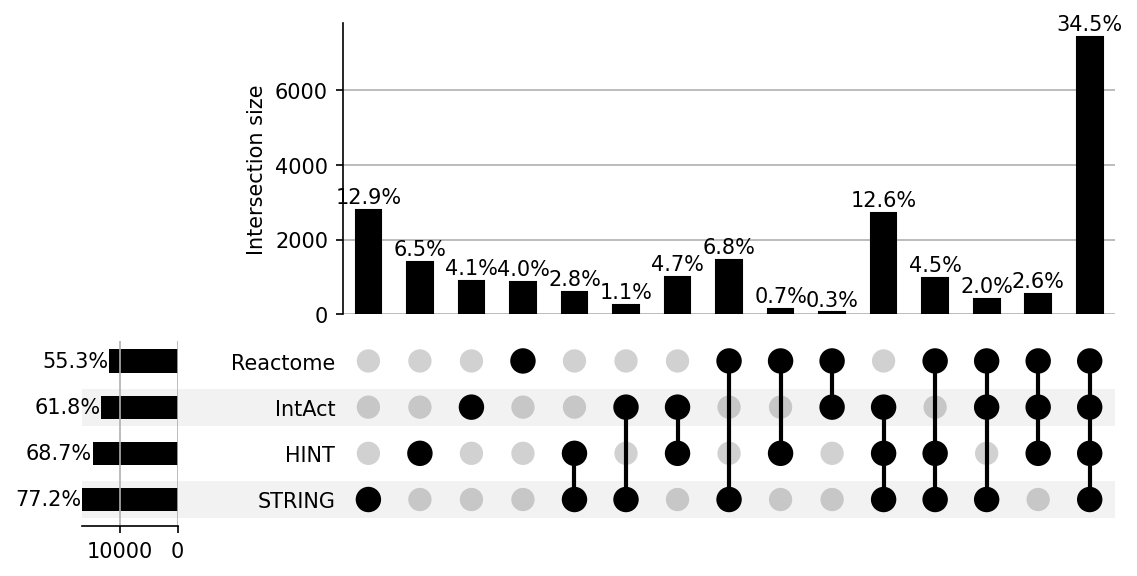

In [9]:
plt.figure(dpi=150)
upsetplot(nodesIntersection,show_percentages=True,orientation='horizontal',fig=plt.gcf())
plt.show()

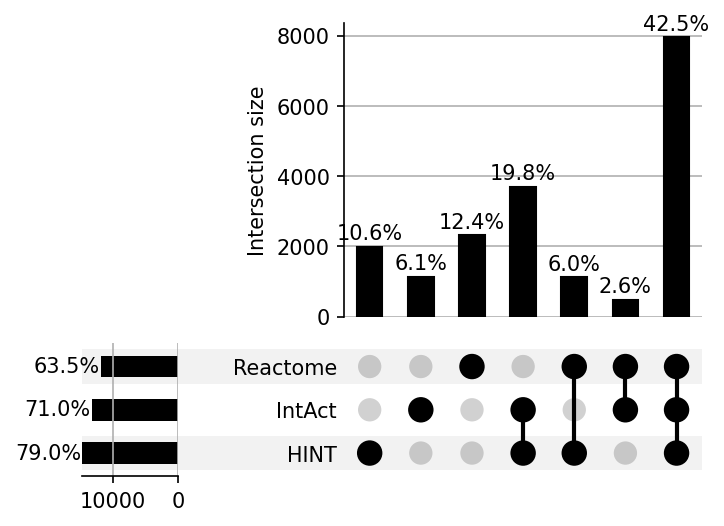

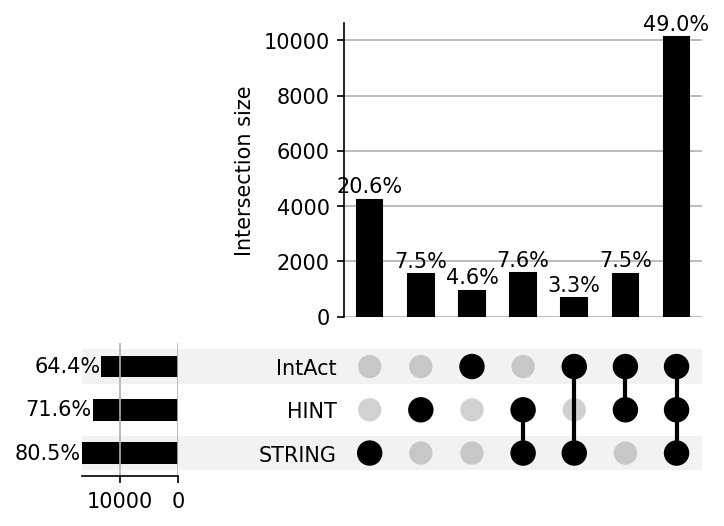

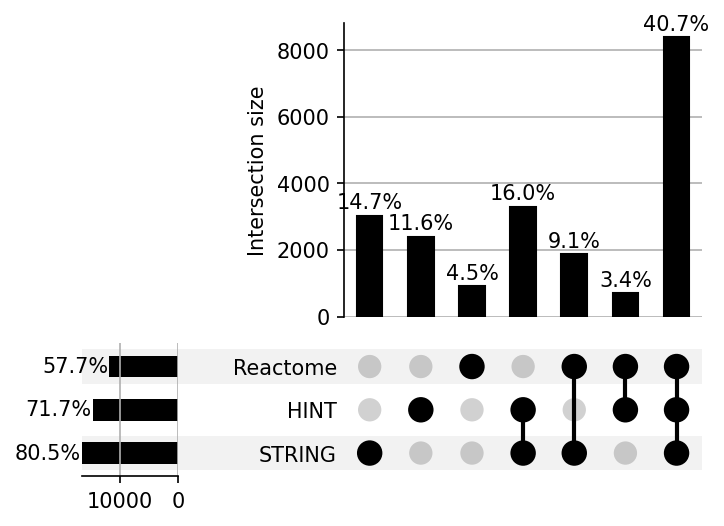

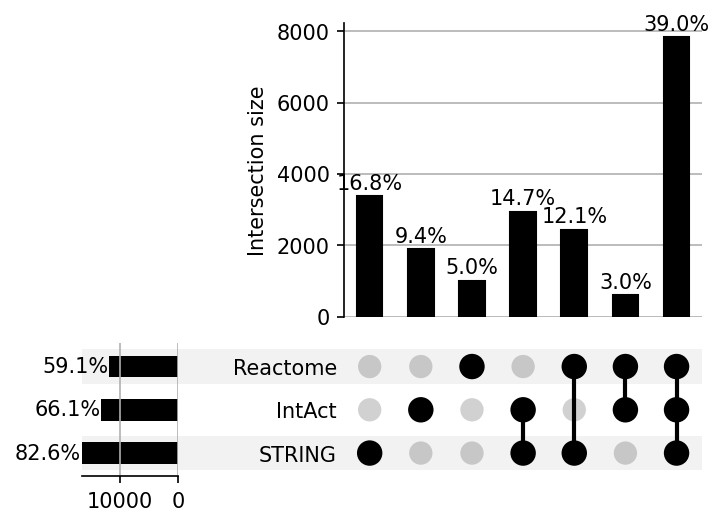

In [10]:
for i,triple in enumerate(groups):
    nodes={}
    plt.figure(dpi=150)
    for name in triple:
        nodes[name]=set(networks[name].nodes)
        
    nodesIntersection = from_contents(nodes)
    upsetplot(nodesIntersection,show_percentages=True,orientation='horizontal',fig=plt.gcf())
    plt.show()